In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
sns.set(style='darkgrid', context='talk', palette='Dark2')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mk73680\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mk73680\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mk73680\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
df = pd.read_csv('dataset.csv')
pprint(df.head())
print(df.iloc[0,2])

   antwort_id                                              Title  \
0     8273117                                                NaN   
1    33446954  Angular JSON Display Single Result without Ng-...   
2    25183554                                                NaN   
3    25194037                                                NaN   
4    16695595                        Twitter iOS 6 oauth or not?   

                                                Body  Score  \
0  <p>You would have to custom code the second pa...      1   
1  <p>I'm still develop app for show news update ...      0   
2  <p>To get the user's information from Twitter,...      2   
3  <p>The Play JSON framework has <a href="http:/...      4   
4  <p>Am i correct in saying that you do not need...      0   

          CreationDate    parentid  Post Link  
0  2011-11-25 18:42:22   8268229.0    8273117  
1  2015-10-31 01:01:22         NaN   33446954  
2  2014-08-07 13:14:55  25178919.0   25183554  
3  2014-08-07 23:47:

In [42]:
sia = SIA()
results = []

for index, row in df.iterrows():
    pol_score = sia.polarity_scores(df.iloc[index,2])
    pol_score['headline'] = df.iloc[index,2]
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': '<p>You would have to custom code the second part.</p>\n'
              '\n'
              '<ol>\n'
              '<li><p>Use <a href="https://dev.twitter.com/docs/api/1/get/statuses/user_timeline" '
              'rel="nofollow">https://dev.twitter.com/docs/api/1/get/statuses/user_timeline</a> - '
              'to get the latest tweets from a specific user.</p></li>\n'
              '<li><p>Write Code to search within the response Object of (1) with the hashtag '
              '(search-key).</p></li>\n'
              '</ol>\n',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.3736,
  'headline': "<p>I'm still develop app for show news update from API Json. Now, I load all of "
              'data from json. Then filter it with ng-repeat. This is the problem because when '
              "load data, it's so slow. So many data.</p>\n"
              '\n'
              '<p>I want to make that in controller, only 1 row selected. So, it can be easy

In [43]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,<p>You would have to custom code the second pa...,0.000,1.000,0.000
1,0.3736,<p>I'm still develop app for show news update ...,0.016,0.942,0.042
2,0.9408,"<p>To get the user's information from Twitter,...",0.000,0.930,0.070
3,0.4830,"<p>The Play JSON framework has <a href=""http:/...",0.022,0.919,0.059
4,0.6705,<p>Am i correct in saying that you do not need...,0.000,0.889,0.111


In [44]:
#Using threshold of -0.2 and 0.2 for labelling data either as positive or negative
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)

Positive headlines:

["<p>I'm still develop app for show news update from API Json. Now, I load all of data from json. Then filter it with ng-repeat. This is the problem because when load data, it's so slow. So many "
 'data.</p>\n'
 '\n'
 '<p>I want to make that in controller, only 1 row selected. So, it can be easyly load to the detail page.</p>\n'
 '\n'
 "<p>I also want to order the news by desc. I've use | orderby. It works. But i must load all of data in one time. It make my apps slow. I want to make swipe to refresh that only show 8 posts at the "
 'first time. But, will load the data when swipe (like twitter).</p>\n'
 '\n'
 '<p>Controller.php</p>\n'
 '\n'
 "<pre><code>.controller('MediaCtrl', function($scope, $http) {\n"
 '\n'
 "  $http.get('http://api.pemiluapi.org/rekam-jejak-media/api/rekam_jejak?apiKey=c6a0237499f3e4197546b5551a3a864f')\n"
 '       .then(function(res){\n'
 '          $scope.medias = res.data;  \n'
 '          //alert(res.data);              \n'
 '        });

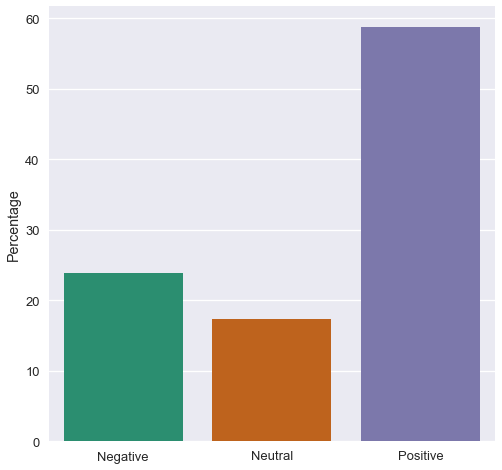

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()
    

In [46]:
stop_words = stopwords.words('english')
print(stop_words[:20])

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)
    
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [47]:
#Positive words from labelled datasets
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)
    

[('gt', 217017),
 ('lt', 193421),
 ('p', 101776),
 ('code', 57984),
 ('1', 43611),
 ('0', 42401),
 ('class', 39881),
 ('com', 39377),
 ('twitter', 38582),
 ('div', 37310),
 ('pre', 30016),
 ('href', 26521),
 ('li', 24360),
 ('api', 22265),
 ('https', 21820),
 ('http', 20668),
 ('2', 20407),
 ('data', 16662),
 ('3', 16017),
 ('id', 15756)]

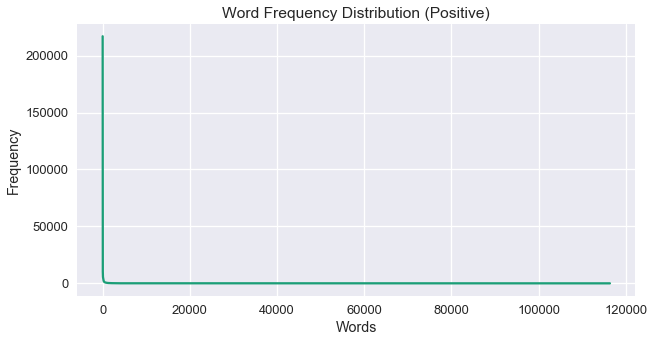

In [48]:
#Frequency distribution of positive words, it follows powerlaw distribution
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

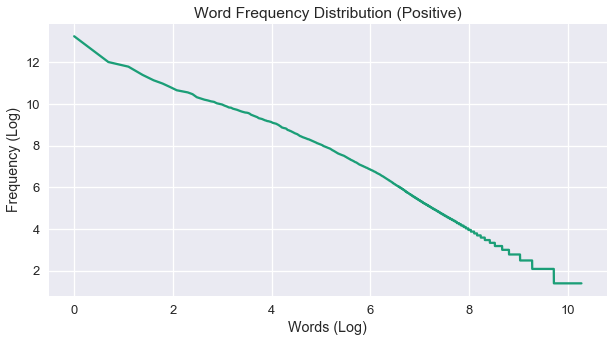

In [49]:
#Plot of log which confirms that less words occupied more space
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()
    

In [50]:
#Repeating same steps for negative words
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)
    

[('gt', 68594),
 ('lt', 61512),
 ('p', 38231),
 ('code', 23990),
 ('1', 22547),
 ('0', 16673),
 ('com', 16603),
 ('twitter', 16188),
 ('pre', 13224),
 ('org', 11017),
 ('class', 10500),
 ('2', 10440),
 ('api', 10073),
 ('div', 9104),
 ('java', 8263),
 ('https', 7505),
 ('jar', 7493),
 ('http', 7368),
 ('error', 7119),
 ('href', 6701)]

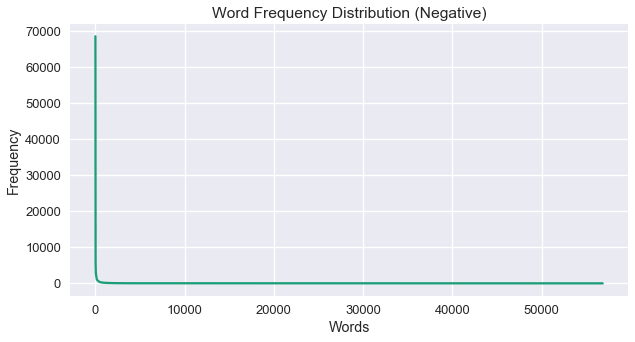

In [51]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

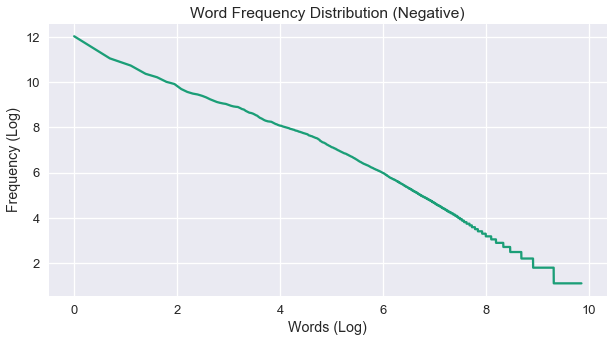

In [52]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()